In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from keras.utils.np_utils import to_categorical
from sklearn.utils import class_weight

import biosppy
import warnings
warnings.filterwarnings('ignore')

In [2]:
def add_gaussian_noise(signal):
    noise=np.random.normal(0,0.05,186)
    return (signal+noise)

In [5]:
train_df=pd.read_csv('/Users/aring/jupyter/differential-privacy/data/Arno/ECGDataDenoised/MUSE_20180111_155115_19000.csv',header=None)


In [6]:
train_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,-165.33,-358.97,-121.710,270.25,-28.869,-231.16,448.39,636.52,618.45,-7.8987,-315.16,-570.84
1,-150.75,-336.81,-114.980,251.41,-23.883,-217.52,441.74,646.47,642.56,35.3890,-269.51,-532.21
2,-136.69,-315.56,-108.630,233.45,-19.126,-204.36,436.06,656.31,665.95,76.5720,-225.83,-495.39
3,-123.74,-296.23,-103.090,217.23,-14.815,-192.29,432.27,666.14,688.05,113.5100,-186.00,-461.84
4,-112.57,-279.75,-98.611,203.53,-11.213,-181.87,431.08,676.31,708.47,144.3000,-151.68,-432.56


In [8]:
train_df.shape

(5000, 12)

In [50]:
lead1=train_df[1]

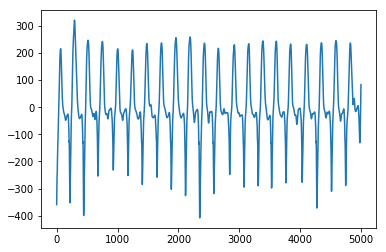

In [51]:
plt.plot(lead1)


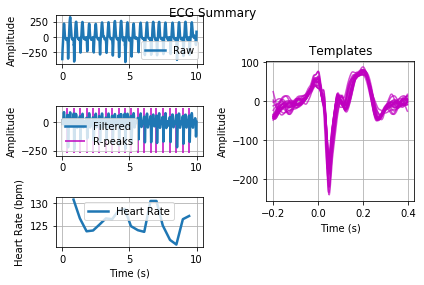

In [52]:
result=biosppy.signals.ecg.ecg(signal=lead1.values, sampling_rate=500, show=True)


In [53]:
result['rpeaks'].tolist()

[193,
 419,
 655,
 905,
 1147,
 1382,
 1624,
 1858,
 2094,
 2325,
 2557,
 2817,
 3053,
 3287,
 3507,
 3743,
 4012,
 4249,
 4491,
 4724]

In [54]:
def partition(list_, indexes):
    if indexes[0] != 0:
        indexes = [0] + indexes
    if indexes[-1] != len(list_):
        indexes = indexes + [len(list_)]
    return [ list_[a:b] for (a,b) in zip(indexes[:-1], indexes[1:])]

In [55]:
heart_beats=partition(lead1.values.tolist(),result['rpeaks'].tolist())
len(heart_beats[3])

250

In [56]:
heart_beats[1]

[-44.357,
 -48.898999999999994,
 -53.443999999999996,
 -57.85,
 -62.228,
 -67.01100000000001,
 -73.053,
 -81.79899999999999,
 -95.036,
 -112.01,
 -125.12,
 -128.48,
 -126.32,
 -124.9,
 -128.49,
 -139.99,
 -160.98,
 -191.06,
 -227.48,
 -265.57,
 -300.08,
 -326.82,
 -343.93,
 -351.88,
 -352.32,
 -346.87,
 -336.57,
 -322.27,
 -305.55,
 -288.56,
 -272.29,
 -256.68,
 -241.51,
 -226.69,
 -212.23,
 -198.09,
 -184.21,
 -170.44,
 -156.56,
 -142.29,
 -127.41,
 -111.97,
 -96.53200000000001,
 -82.131,
 -69.718,
 -59.637,
 -51.603,
 -45.058,
 -39.477,
 -34.459,
 -29.704,
 -24.956999999999997,
 -19.969,
 -14.5,
 -8.3411,
 -1.3562,
 6.4802,
 15.119000000000002,
 24.52,
 34.735,
 45.891999999999996,
 58.073,
 71.134,
 84.664,
 98.167,
 111.32,
 124.04,
 136.36,
 148.26,
 159.68,
 170.49,
 180.55,
 189.77,
 198.13,
 205.71,
 212.62,
 219.01,
 225.0,
 230.7,
 236.15,
 241.36,
 246.33,
 251.08,
 255.64,
 260.05,
 264.38,
 268.77,
 273.36,
 278.3,
 283.68,
 289.41,
 295.26,
 300.89,
 305.97,
 310.28,
 313

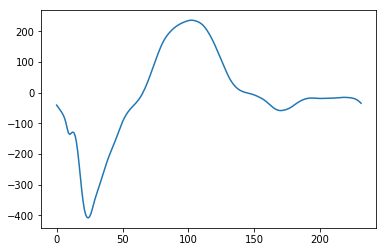

In [60]:
plt.plot(heart_beats[10])


In [19]:
from sklearn.utils import resample
df_1=train_df[train_df[187]==1]
df_2=train_df[train_df[187]==2]
df_3=train_df[train_df[187]==3]
df_4=train_df[train_df[187]==4]
df_0=(train_df[train_df[187]==0]).sample(n=20000,random_state=42)

df_1_upsample=resample(df_1,replace=True,n_samples=20000,random_state=123)
df_2_upsample=resample(df_2,replace=True,n_samples=20000,random_state=124)
df_3_upsample=resample(df_3,replace=True,n_samples=20000,random_state=125)
df_4_upsample=resample(df_4,replace=True,n_samples=20000,random_state=126)

train_df=pd.concat([df_0,df_1_upsample,df_2_upsample,df_3_upsample,df_4_upsample])

KeyError: 187

In [10]:
c=train_df.groupby(187,group_keys=False).apply(lambda train_df : train_df.sample(1))


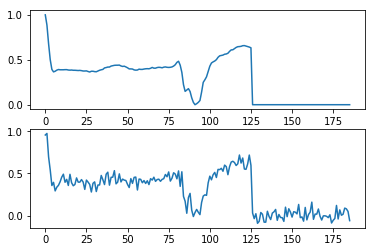

In [21]:
#I use a fonction ( will depend of the version) where i add a noise to the data to generilize my train.

tempo=c.iloc[0,:186]
bruiter=add_gaussian_noise(tempo)

plt.subplot(2,1,1)
plt.plot(c.iloc[0,:186])

plt.subplot(2,1,2)
plt.plot(bruiter)

plt.show()

In [22]:
target_train=train_df[187]
target_test=test_df[187]
y_train=to_categorical(target_train)
y_test=to_categorical(target_test)

In [23]:
X_train=train_df.iloc[:,:186].values
X_test=test_df.iloc[:,:186].values

X_train = X_train.reshape(len(X_train), X_train.shape[1],1)
X_test = X_test.reshape(len(X_test), X_test.shape[1],1)

In [30]:
from IPython.display import display, HTML
display(X_train)

array([[[0.1627907 ],
        [0.54069769],
        [0.75581396],
        ...,
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.99006623],
        [0.93874174],
        [0.34437087],
        ...,
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.97423887],
        [0.93208432],
        [0.59016395],
        ...,
        [0.        ],
        [0.        ],
        [0.        ]],

       ...,

       [[0.79393941],
        [0.69090909],
        [0.57727271],
        ...,
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.97739506],
        [0.93864369],
        [0.88912809],
        ...,
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.87138265],
        [0.6141479 ],
        [0.55305469],
        ...,
        [0.        ],
        [0.        ],
        [0.        ]]])

In [26]:
def network(X_train,y_train,X_test,y_test):
    im_shape=(X_train.shape[1],1)
    inputs_cnn=Input(shape=(im_shape), name='inputs_cnn')
    conv1_1=Convolution1D(64, (6), activation='relu', input_shape=im_shape)(inputs_cnn)
    conv1_1=BatchNormalization()(conv1_1)
    pool1=MaxPool1D(pool_size=(3), strides=(2), padding="same")(conv1_1)
    conv2_1=Convolution1D(64, (3), activation='relu', input_shape=im_shape)(pool1)
    conv2_1=BatchNormalization()(conv2_1)
    pool2=MaxPool1D(pool_size=(2), strides=(2), padding="same")(conv2_1)
    conv3_1=Convolution1D(64, (3), activation='relu', input_shape=im_shape)(pool2)
    conv3_1=BatchNormalization()(conv3_1)
    pool3=MaxPool1D(pool_size=(2), strides=(2), padding="same")(conv3_1)
    flatten=Flatten()(pool3)
    dense_end1 = Dense(64, activation='relu')(flatten)
    dense_end2 = Dense(32, activation='relu')(dense_end1)
    main_output = Dense(5, activation='softmax', name='main_output')(dense_end2)
    
    
    model = Model(inputs= inputs_cnn, outputs=main_output)
    model.compile(optimizer='adam', loss='categorical_crossentropy',metrics = ['accuracy'])
    
    
    callbacks = [EarlyStopping(monitor='val_loss', patience=8),
             ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)]

    history=model.fit(X_train, y_train,epochs=40,callbacks=callbacks, batch_size=32,validation_data=(X_test,y_test))
    model.load_weights('best_model.h5')
    return(model,history)

In [27]:
def evaluate_model(history,X_test,y_test,model):
    scores = model.evaluate((X_test),y_test, verbose=0)
    print("Accuracy: %.2f%%" % (scores[1]*100))
    
    print(history)
    fig1, ax_acc = plt.subplots()
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Model - Accuracy')
    plt.legend(['Training', 'Validation'], loc='lower right')
    plt.show()
    
    fig2, ax_loss = plt.subplots()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Model- Loss')
    plt.legend(['Training', 'Validation'], loc='upper right')
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.show()
    target_names=['0','1','2','3','4']
    
    y_true=[]
    for element in y_test:
        y_true.append(np.argmax(element))
    prediction_proba=model.predict(X_test)
    prediction=np.argmax(prediction_proba,axis=1)
    cnf_matrix = confusion_matrix(y_true, prediction)
    

In [29]:
from keras.layers import Dense, Convolution1D, MaxPool1D, Flatten, Dropout
from keras.layers import Input
from keras.models import Model
from keras.layers.normalization import BatchNormalization
import keras
from keras.callbacks import EarlyStopping, ModelCheckpoint
model,history=network(X_train,y_train,X_test,y_test)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 100000 samples, validate on 21892 samples
Epoch 1/40
100000/100000 [==============================] - 78s 780us/step - loss: 0.1900 - acc: 0.9319 - val_loss: 0.1788 - val_acc: 0.9374
Epoch 2/40
100000/100000 [==============================] - 83s 826us/step - loss: 0.0728 - acc: 0.9751 - val_loss: 0.1179 - val_acc: 0.9637
Epoch 3/40
100000/100000 [==============================] - 80s 798us/step - loss: 0.0485 - acc: 0.9839 - val_loss: 0.1216 - val_acc: 0.9629
Epoch 4/40
100000/100000 [==============================] - 70s 700us/step - loss: 0.0375 - acc: 0.9877 - val_loss: 0.1270 - val_acc: 0.9640
Epoch 5/40
100000/100000 [==============================] - 69s 687us/step - loss: 0.0305 - acc: 0.9902 - val_loss: 0.1211 - val_acc: 0.9682
Epoch 6/40
100000/100000 [==============================] - 70s 698us/step - loss: 0.0249 - acc: 0.9920 - val_loss: 0.1897 -

Accuracy: 97.97%


KeyError: 'accuracy'

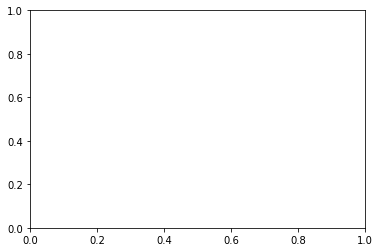

In [32]:
evaluate_model(history,X_test,y_test,model)
y_pred=model.predict(X_test)

In [33]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(10, 10))
plot_confusion_matrix(cnf_matrix, classes=['N', 'S', 'V', 'F', 'Q'],normalize=True,
                      title='Confusion matrix, with normalization')
plt.show()


NameError: name 'y_pred' is not defined

#### Sources
https://www.kaggle.com/gregoiredc/arrhythmia-on-ecg-classification-using-cnn/data